In [1]:
import os
os.chdir("/Users/dongminsun/Desktop/DSC 672 Project - Play by Play")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
madden = pd.read_excel("madden_nfl_20_final_ovr_ratings_1.xlsx")

In [60]:
pd.set_option('display.max_columns', None)

In [13]:
madden.head()

,2019 Arizona Cardinals,Unnamed: 1,Unnamed: 2,2019 Atlanta Falcons,Unnamed: 4,Unnamed: 5,2019 Baltimore Ravens,Unnamed: 7,Unnamed: 8,2019 Buffalo Bills,Unnamed: 10,Unnamed: 11,2019 Carolina Panthers,Unnamed: 13,Unnamed: 14,2019 Chicago Bears,Unnamed: 16,Unnamed: 17,2019 Cincinnati Bengals,Unnamed: 19,Unnamed: 20,2019 Cleveland Browns,Unnamed: 22,Unnamed: 23,2019 Dallas Cowboys,Unnamed: 25,Unnamed: 26,2019 Denver Broncos,Unnamed: 28,Unnamed: 29,2019 Detroit Lions,Unnamed: 31,Unnamed: 32,2019 Green Bay Packers,Unnamed: 34,Unnamed: 35,2019 Houston Texans,Unnamed: 37,Unnamed: 38,2019 Indianapolis Colts,Unnamed: 40,Unnamed: 41,2019 Jacksonville Jaguars,Unnamed: 43,Unnamed: 44,2019 Kansas City Chiefs,Unnamed: 46,Unnamed: 47,2019 Los Angeles Chargers,Unnamed: 49,Unnamed: 50,2019 Los Angeles Rams,Unnamed: 52,Unnamed: 53,2019 Miami Dolphins,Unnamed: 55,Unnamed: 56,2019 Minnesota Vikings,Unnamed: 58,Unnamed: 59,2019 New England Patriots,Unnamed: 61,Unnamed: 62,2019 New Orleans Saints,Unnamed: 64,Unnamed: 65,2019 New York Giants,Unnamed: 67,Unnamed: 68,2019 New York Jets,Unnamed: 70,Unnamed: 71,2019 Oakland Raiders,Unnamed: 73,Unnamed: 74,2019 Philadelphia Eagles,Unnamed: 76,Unnamed: 77,2019 Pittsburgh Steelers,Unnamed: 79,Unnamed: 80,2019 San Francisco 49ers,Unnamed: 82,Unnamed: 83,2019 Seattle Seahawks,Unnamed: 85,Unnamed: 86,2019 Tampa Bay Buccaneers,Unnamed: 88,Unnamed: 89,2019 Tennessee Titans,Unnamed: 91,Unnamed: 92,2019 Washington Redskins,Unnamed: 94,Unnamed: 95
0,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall,Position,Player,Overall
1,QB,Kyler Murray,75,QB,Matt Ryan,87,QB,Lamar Jackson,92,QB,Josh Allen,77,QB,Cam Newton,79,QB,Mitchell Trubisky,73,QB,Andy Dalton,72,QB,Baker Mayfield,76,QB,Dak Prescott,81,QB,Joe Flacco,71,QB,Matthew Stafford,82,QB,Aaron Rodgers,89,QB,Deshaun Watson,86,QB,Jacoby Brissett,72,QB,Nick Foles,71,QB,Patrick Mahomes,99,QB,Philip Rivers,84,QB,Jared Goff,77,QB,Ryan Fitzpatrick,74,QB,Kirk Cousins,82,QB,Tom Brady,91,QB,Drew Brees,94,QB,Daniel Jones,70,QB,Sam Darnold,74,QB,Derek Carr,80,QB,Carson Wentz,83,QB,Ben Roethlisberger,81,QB,Jimmy Garoppolo,84,QB,Russell Wilson,97,QB,Jameis Winston,78,QB,Ryan Tannehill,80,QB,Dwayne Haskins Jr.,70
2,QB,Brett Hundley,64,QB,Matt Schaub,58,QB,Robert Griffin III,66,QB,Matt Barkley,64,QB,Kyle Allen,65,QB,Chase Daniel,63,QB,Ryan Finley,56,QB,Drew Stanton,59,QB,Cooper Rush,53,QB,Drew Lock,68,QB,Jeff Driskel,61,QB,Tim Boyle,59,QB,A.J. McCarron,60,QB,Brian Hoyer,63,QB,Gardner Minshew II,69,QB,Matt Moore,65,QB,Tyrod Taylor,70,QB,Blake Bortles,66,QB,Josh Rosen,67,QB,Sean Mannion,52,QB,Cody Kessler,59,QB,Teddy Bridgewater,75,QB,Eli Manning,69,QB,Trevor Siemian,60,QB,DeShone Kizer,60,QB,Josh McCown,67,QB,Mason Rudolph,63,QB,Nick Mullens,67,QB,Geno Smith,57,QB,Blaine Gabbert,61,QB,Marcus Mariota,68,QB,Alex Smith,69
3,HB,Kenyan Drake,81,QB,Kurt Benkert,48,QB,Trace McSorley,55,HB,Frank Gore,80,QB,Will Grier,62,HB,Tarik Cohen,78,QB,Jake Dolegala,54,QB,Garrett Gilbert,48,HB,Ezekiel Elliott,93,QB,Brandon Allen,51,QB,Kyle Slotter,57,HB,Aaron Jones,87,QB,Joe Webb III,53,QB,Chad Kelly,59,QB,Joshua Dobbs,62,QB,Chad Henne,58,QB,Easton Stick,61,HB,Todd Gurley II,86,HB,Kalen Ballage,70,HB,Dalvin Cook,90,QB,Jarrett Stidham,58,QB,Taysom Hill,64,QB,Alex Tanney,47,QB,David Fales,59,QB,Mike Glennon,58,QB,Nate Sudfeld,

In [16]:
play = pd.read_csv("nfl_scrapr_plus_plyr_odds.csv")

/Users/dongminsun/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (168,169,170,171,176,177,180,181,184,185,190,191,192,193,196,197,205,206,207,220,221,222,223,224,225,228,229,233,234,235,240,242,243) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
play.head()

,Unnamed: 0,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_pla

In [20]:
play["play_type"].value_counts()

pass           19063
run            13021
no_play         4444
kickoff         2587
punt            2150
extra_point     1193
field_goal       979
qb_kneel         397
qb_spike          72
Name: play_type, dtype: int64

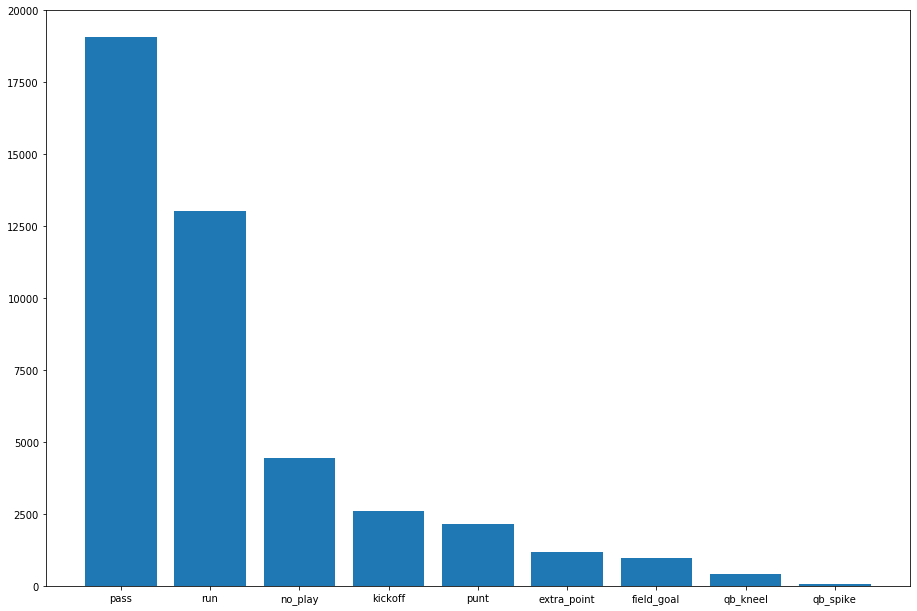

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
frequency = ['pass', 'run', 'no_play', 'kickoff', 'punt', 'extra_point', 'field_goal', 'qb_kneel', 'qb_spike']
play_type = [19063,13021,4444,2587,2150,1193,979,397,72]
ax.bar(frequency,play_type)
plt.show()

In [31]:
import seaborn as sns
sns.set(style="darkgrid")

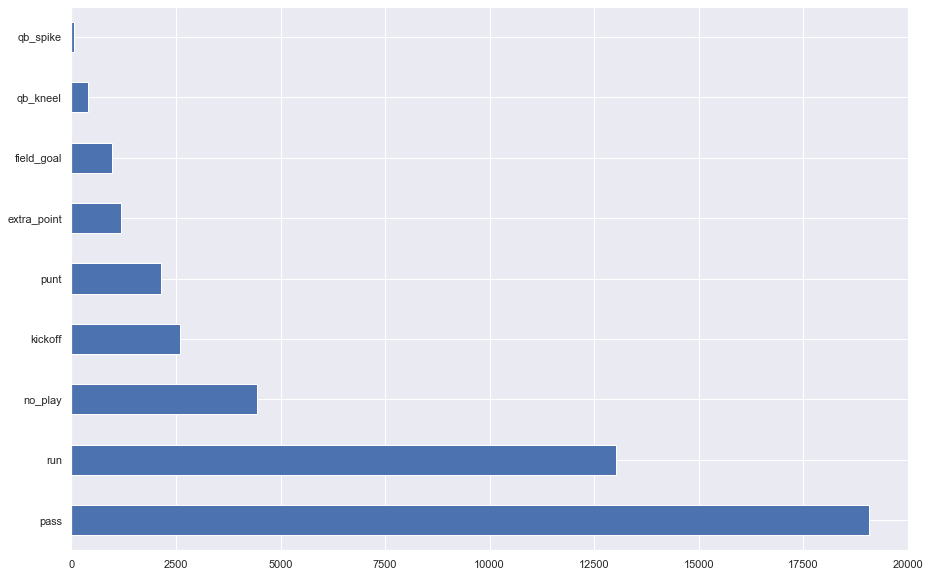

In [49]:
play['play_type'].value_counts().plot(kind='barh', figsize=(15,10))


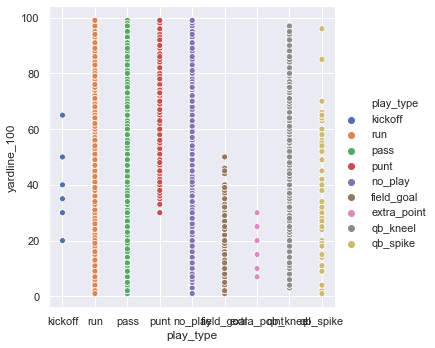

In [51]:
sns.relplot(x="play_type", y="yardline_100", hue="play_type", data=play)


In [61]:
summary = (
    play
    .groupby('play_type')
    .filter(lambda x : len(x) > 500)
    .groupby(['play_type', 'Win Prob'])
    .size()
    .to_frame('medal count')
    .reset_index()
)

# wrap long country names
summary['play_type'] = summary['play_type'].str.replace(' ', '\n')
summary

,play_type,Win Prob,medal count
0,extra_point,0.066667,2
1,extra_point,0.100000,2
2,extra_point,0.105263,4
3,extra_point,0.111111,4
4,extra_point,0.133333,1
...,...,...,...
827,run,0.937500,66
828,run,0.941176,27
829,run,0.961538,34
830,run,0.975610,25


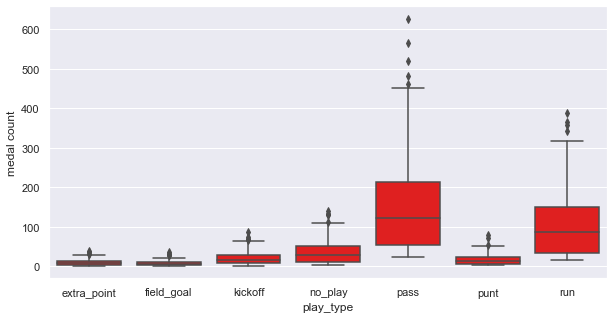

In [63]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=summary,
    x='play_type',
    y='medal count',
    color='red')

In [78]:
home_summary = (
    play
    .groupby('home_team')
    .filter(lambda x : len(x) > 500)
    .groupby(['home_team', 'Win Prob'])
    .size()
    .to_frame('medal count')
    .reset_index()
)

# wrap long country names
#team_summary['home_team'] = summary['home_team'].str.replace(' ', '\n')
home_summary

,home_team,Win Prob,medal count
0,ARI,0.215054,71
1,ARI,0.322581,77
2,ARI,0.416667,174
3,ARI,0.434783,115
4,ARI,0.454545,82
...,...,...,...
458,WAS,0.705882,83
459,WAS,0.726027,85
460,WAS,0.756098,95
461,WAS,0.833333,77


<Figure size 2880x720 with 0 Axes>

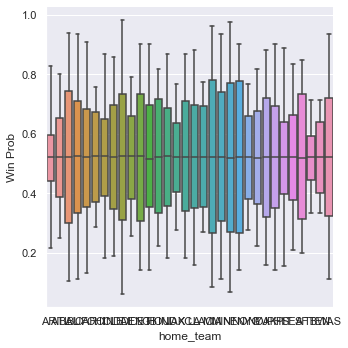

In [88]:
plt.figure(figsize=(40,10))

home = sns.catplot(
    data=home_summary,
    x='home_team',
    y='Win Prob',
    #hue='Medal',
    kind='box')

In [86]:
away_summary = (
    play
    .groupby('away_team')
    .filter(lambda x : len(x) > 500)
    .groupby(['away_team', 'Win Prob'])
    .size()
    .to_frame('medal count')
    .reset_index()
)

# wrap long country names
#team_summary['home_team'] = summary['home_team'].str.replace(' ', '\n')
#away_summary

<Figure size 288000x72000 with 0 Axes>

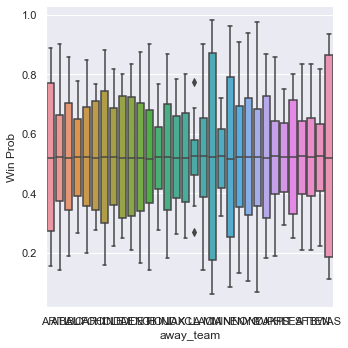

In [84]:
plt.figure(figsize=(4000,1000))

away = sns.catplot(
    data=away_summary,
    x='away_team',
    y='Win Prob',
    #hue='Medal',
    kind='box')

# EPA
Expected Points Added (EPA) is a football statistic that seeks to measure the value of individual plays in terms of points. This is done by calculating the Expected Points (EP) of the down, distance, and field position situation at the start of a play and contrasting it with the situation at the end of the play.

In [90]:
example1 = play[0:173]
example1

,Unnamed: 0,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_pla

In [97]:
# epa with different play type
